In [17]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("C:\\Users\\sanja\\OneDrive\\Pictures\\All working files\\data\\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
df = df.iloc[:,1:]

In [7]:
df.head(2)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0


In [9]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [10]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [12]:
X = df.iloc[:,0:3].values
X

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]], dtype=int64)

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X=X)
X

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [14]:
y = df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [74]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
Knn = KNeighborsClassifier(n_neighbors=5)

In [23]:
Knn.fit(X_train,y_train)
y_pred = Knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.95

In [75]:
class Knn:
    def __init__(self,k):
        self.n_neighbors = k
        self.X_train = None
        self.y_train = None

    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):

        for i in X_test:
            # calculate distance from each training point
            distances = []
            for j in self.X_train:
                distances.append(self.calculate_distances(i,j))   

            n_neighbors = sorted(list(enumerate(distances)),key=lambda x: x[1])[0:self.n_neighbors]
            print(n_neighbors)
            self.majority_count(n_neighbors)
            
    def calculate_distances(self,point_A, point_B):
        return np.linalg.norm(point_A - point_B) 

    def majority_count(self,neighbors):
        votes = []
        for i in neighbors:
            print(i,self.y_train.loc[i[0]])
            
              

In [81]:
X

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [84]:
X = np.delete(X,2,1)

In [86]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [88]:
Knn = KNeighborsClassifier(n_neighbors=5)

In [89]:
Knn.fit(X_train,y_train)
y_pred = Knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9

In [107]:
X[:,0].shape

(400,)

In [103]:
a  = np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
b = np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)

XX, YY = np.meshgrid(a,b)

In [104]:
XX.shape

(602, 401)

In [105]:
YY.shape

(602, 401)

In [109]:
input_arr = np.array([XX.ravel(), YY.ravel()]).T

In [111]:
input_arr.shape

(241402, 2)

In [112]:
labels = Knn.predict(input_arr)

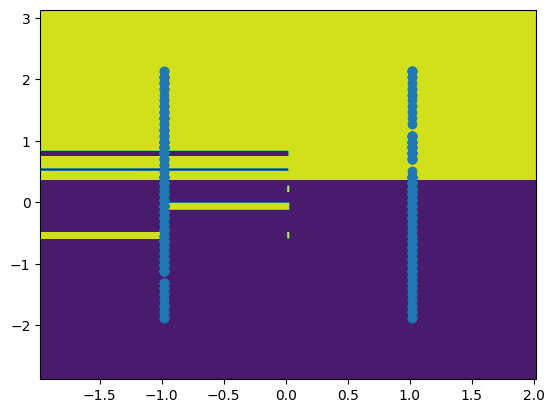

In [113]:
import matplotlib.pyplot as plt 

plt.contourf(XX,YY,labels.reshape(602, 401))
plt.scatter(X[:,0],X[:,1])